In [0]:
#˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚ TASK 1 ˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚#

In [0]:
import os
from pyspark.sql import Row
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import csv

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[3]: [FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710945103000),
 FileInfo(path='dbfs:/FileStore/tables/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1709905302000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023', name='clinicaltrial_2023', size=292436366, modificationTime=1712167487000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv/', name='clinicaltrial_2023.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1709905902000),
 FileInfo(path='dbfs:/FileStore/tables

In [0]:
FilePath="/FileStore/tables/clinicaltrial_2023"
dbutils.fs.cp(FilePath + ".zip" ,"file:/tmp/")

Out[4]: True

In [0]:
%fs ls file:/tmp/

path,name,size,modificationTime
file:/tmp/hsperfdata_root/,hsperfdata_root/,4096,1712312453233
file:/tmp/tmp.fy6lI0GCK0,tmp.fy6lI0GCK0,0,1712312437485
file:/tmp/clinicaltrial_2023.zip,clinicaltrial_2023.zip,57166668,1712312546395
file:/tmp/systemd-private-deed753be29b4911bb0b4b386995d2b3-systemd-resolved.service-kM86th/,systemd-private-deed753be29b4911bb0b4b386995d2b3-systemd-resolved.service-kM86th/,4096,1712312428662
file:/tmp/.ICE-unix/,.ICE-unix/,4096,1712312428658
file:/tmp/chauffeur-env.sh,chauffeur-env.sh,156,1712312435693
file:/tmp/python_lsp_logs/,python_lsp_logs/,4096,1712312537932
file:/tmp/systemd-private-deed753be29b4911bb0b4b386995d2b3-apache2.service-GOxU7h/,systemd-private-deed753be29b4911bb0b4b386995d2b3-apache2.service-GOxU7h/,4096,1712312440517
file:/tmp/.font-unix/,.font-unix/,4096,1712312428658
file:/tmp/.XIM-unix/,.XIM-unix/,4096,1712312428658


In [0]:
%sh
ls /tmp/

Rserv
Rtmp0UaFRT
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
python_lsp_logs
systemd-private-deed753be29b4911bb0b4b386995d2b3-apache2.service-GOxU7h
systemd-private-deed753be29b4911bb0b4b386995d2b3-ntp.service-3HFK9f
systemd-private-deed753be29b4911bb0b4b386995d2b3-systemd-logind.service-bEetNh
systemd-private-deed753be29b4911bb0b4b386995d2b3-systemd-resolved.service-kM86th
tmp.fy6lI0GCK0


In [0]:
fileroot="clinicaltrial_2023"
dbutils.fs.cp("/FileStore/tables/"+ fileroot + ".zip", "file:/tmp/")

Out[6]: True

In [0]:
os.environ['fileroot']=fileroot

In [0]:
%sh
unzip -d /tmp /tmp/${fileroot}.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv", "/FileStore/tables/" + fileroot, True)

Out[9]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot)

Out[10]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023', name='clinicaltrial_2023', size=292436366, modificationTime=1712312605000)]

In [0]:
dbutils.fs.head(FilePath)

[Truncated to first 65536 bytes]
Out[11]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02

In [0]:
RDD = sc.textFile(FilePath)
RDD.take(3)

Out[12]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
Delimiter="\t"
RDD_Step1=RDD.map(lambda s: s.replace(',,', ''))
RDD_Step2=RDD_Step1.map(lambda s: s.replace('"', ''))
RDD_Cleaned=RDD_Step2.map(lambda s: s.split(Delimiter))
RDD_Cleaned.take(3)

Out[13]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28,'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascul

In [0]:
def set_length(row, length):
    return row + ([None] * (length - len(row)))

RDD_Final = RDD_Cleaned.map(lambda row: set_length(row, 14))

In [0]:
#Question Number 1

Header = RDD_Final.first()
Study_Count_Distinct = RDD_Final.filter(lambda x: x != Header).map(lambda x: x[1]).distinct().count()
print("Number Of Distinct Studies:" , Study_Count_Distinct)

Number Of Distinct Studies: 481102


In [0]:
#Question Number 2

Header = RDD_Final.first()
Type_Values = RDD_Final.filter(lambda row: row != Header).map(lambda row: row[10])
Blank_Count = Type_Values.filter(lambda value: value == '').count()
Type_Values_NotNull = Type_Values.filter(lambda value: value is not None and value != '')
Type_Frequencies = Type_Values_NotNull.countByValue().items()
Sorted_Type_Frequencies = sorted(Type_Frequencies, key=lambda x: x[1], reverse=True)
print("Types With Frequencies:")
for type, frequency in Sorted_Type_Frequencies:
    print(type, ":", frequency)

print("Blank Values:", Blank_Count)

Types With Frequencies:
INTERVENTIONAL : 371382
OBSERVATIONAL : 110221
EXPANDED_ACCESS : 928
Blank Values: 889


In [0]:
#Question Number 3

Conditions = RDD_Final.map(lambda row: row[4].split('|')).flatMap(lambda conditions: conditions)
Condition_Frequencies = Conditions.countByValue().items()
Sorted_Condition_Frequencies = sorted(Condition_Frequencies, key=lambda x: x[1], reverse=True)
print("Top 5 Conditions With Frequencies:")
for condition, frequency in Sorted_Condition_Frequencies[:5]:
    print(condition, ":", frequency)

Top 5 Conditions With Frequencies:
Healthy : 9731
Breast Cancer : 7502
Obesity : 6549
Stroke : 4072
Hypertension : 4020


In [0]:
dbutils.fs.cp("/FileStore/tables/pharma.zip","file:/tmp/")

Out[18]: True

In [0]:
%sh
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh
ls /tmp/pharma.csv

/tmp/pharma.csv


In [0]:
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma" , True)

Out[21]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/pharma" )

Out[22]: [FileInfo(path='dbfs:/FileStore/tables/pharma', name='pharma', size=678999, modificationTime=1712312774000)]

In [0]:
rdd = sc.textFile("/FileStore/tables/pharma")
rdd.take(3)

Out[23]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

In [0]:
#Question Number 4

def parse_csv(line):
    return next(csv.reader([line]))

header = rdd.first()
rdd_pharma = rdd.filter(lambda line: line != header).map(parse_csv)
rdd_pharmaceutical = rdd_pharma.map(lambda line: line[1]).distinct()
rdd_set = set(rdd_pharmaceutical.collect())
rdd_trials = RDD_Final.filter(lambda x: x[6] not in rdd_set)
sponsor_counts = rdd_trials.map(lambda x: (x[6], 1)).reduceByKey(lambda a, b: a + b)
top_sponsors = sponsor_counts.sortBy(lambda x: x[1], ascending=False).take(10)
print("Top 10 Non-Pharmaceutical Sponsors With Clinical Trials:")
for sponsor, count in top_sponsors:
    print(sponsor, ":", count)

Top 10 Non-Pharmaceutical Sponsors With Clinical Trials:
National Cancer Institute (NCI) : 3410
Assiut University : 3335
Cairo University : 3023
Assistance Publique - Hôpitaux de Paris : 2951
Mayo Clinic : 2766
M.D. Anderson Cancer Center : 2702
Novartis Pharmaceuticals : 2393
National Institute of Allergy and Infectious Diseases (NIAID) : 2340
Massachusetts General Hospital : 2263
National Taiwan University Hospital : 2181


In [0]:
RDD_SetDate = RDD_Final.map(lambda row: tuple(field.replace(',', '') if i == len(row) - 1 else field for i, field in enumerate(row)))
RDD_SetDate.take(5)

Out[25]: [('Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'),
 ('NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'),
 ('NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascula

Completed Studies In 2023-01 : 1494
Completed Studies In 2023-02 : 1272
Completed Studies In 2023-03 : 1552
Completed Studies In 2023-04 : 1324
Completed Studies In 2023-05 : 1415
Completed Studies In 2023-06 : 1619
Completed Studies In 2023-07 : 1360
Completed Studies In 2023-08 : 1230
Completed Studies In 2023-09 : 1152
Completed Studies In 2023-10 : 1058
Completed Studies In 2023-11 : 909
Completed Studies In 2023-12 : 1082


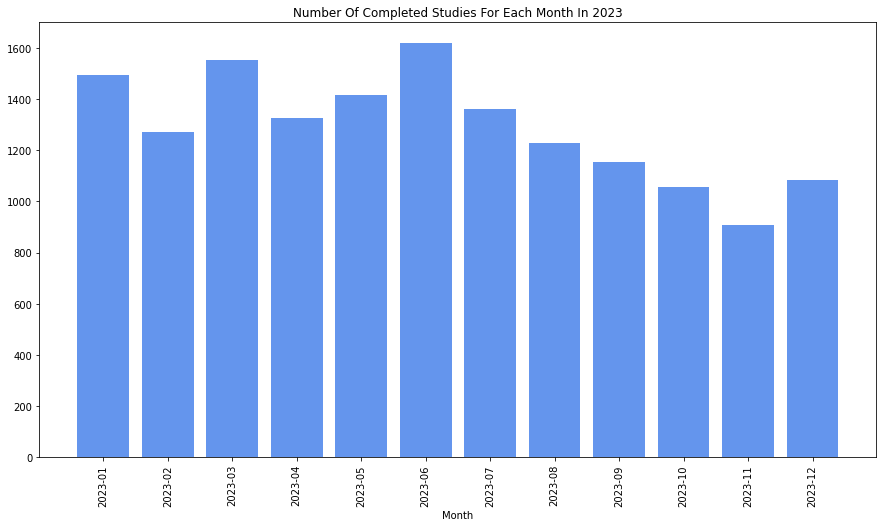

In [0]:
#Question Number 5

month_2023 = []

for month in range(1, 13):
    month_str = "2023-{0:02d}".format(month)
    month_values = (RDD_Final.filter(lambda row: len(row) > 13 and row[13] and "COMPLETED" in row[3] and month_str in row[13])
    .count()
)
    month_2023.append(month_values)
    print("Completed Studies In" , month_str, ":", month_values)


months = ["2023-{0:02d}".format(month) for month in range(1, 13)]

plt.figure(figsize=(15, 8))
plt.bar(months, month_2023, color='cornflowerblue')
plt.xlabel('Month')
plt.title('Number Of Completed Studies For Each Month In 2023')
plt.xticks(rotation=90)
plt.show()